## Better Pandas

This section cover tools to make your experience with Pandas a litte bit better.

### tqdm: Add Progress Bar to Your Pandas Apply

In [ ]:
!pip install tqdm 

If you want to keep informed about the progress of a pandas apply operation, use tqdm.

In [1]:
import pandas as pd 
from tqdm import tqdm 
import time 

df = pd.DataFrame({'a': [1, 2, 3, 4, 5], 'b': [2, 3, 4, 5, 6]})

tqdm.pandas()
def func(row):
    time.sleep(1)
    return row + 1

df['a'].progress_apply(func)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:05<00:00,  1.00s/it]


0    2
1    3
2    4
3    5
4    6
Name: a, dtype: int64

[Link to tqdm](https://github.com/tqdm/tqdm).

### pandarallel: A Simple Tool to Parallelize Pandas Operations 

In [ ]:
!pip install pandarallel

If you want to parallelize your Pandas operations on all available CPUs by adding only one line of code, try pandarallel. 

In [13]:
from pandarallel import pandarallel
import pandas as pd
from numpy.random import randint

df = pd.DataFrame(
    {
        "a": randint(0, 100, size=10000),
        "b": randint(0, 100, size=10000),
        "c": randint(0, 100, size=10000),
    }
)

pandarallel.initialize(progress_bar=True)
df.parallel_apply(lambda x: x**2)


INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


,a,b,c
0,3025,324,441
1,1,6561,5329
2,2025,4900,1024
3,25,5776,25
4,16,8100,3364
...,...,...,...
9995,49,676,4761
9996,3721,6889,4
9997,4225,9025,1156
9998,361,9,529


[Link to pandarallel](https://github.com/nalepae/pandarallel).

### PandasAI: Gain Insights From Your pandas DataFrame With AI

In [ ]:
!pip install pandasai

If you want to quickly gain insights from your pandas DataFrame with AI, use PandasAI. PandasAI serves as: 

- A tool to analyze your DataFrame
- Not a tool to process your DataFrame

In [2]:
import pandas as pd  

df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/flights.csv")
df.head(10)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


In [4]:
df.head(5)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [6]:
from pandasai import PandasAI
from pandasai.llm.openai import OpenAI

# Instantiate a LLM
llm = OpenAI(api_token="YOUR_API_TOKEN")

# Use pandasai
pandas_ai = PandasAI(llm, conversational=False)
print(
    pandas_ai.run(
        df,
        prompt="Which month of the years has the highest number of passengers on average?",
    )
)


The month with the highest average number of passengers is: July



In [7]:
print(
    pandas_ai.run(
        df, prompt="Which are the five years with the highest passenger numbers?"
    )
)


year
1960    5714
1959    5140
1958    4572
1957    4421
1956    3939
Name: passengers, dtype: int64



In [8]:
print(pandas_ai.run(df, prompt="Within what range of years does the dataset span?"))


        year     month  passengers
0 1949-01-01   January         112
1 1949-01-01  February         118
2 1949-01-01     March         132
3 1949-01-01     April         129
4 1949-01-01       May         121
The dataset spans from 1949 to 1960.



[Link to PandasAI](https://github.com/gventuri/pandas-ai).

### fugue: Use pandas Functions on the Spark and Dask Engines. 

In [ ]:
!pip install fugue pyspark

Wouldn't it be nice if you can leverage Spark or Dask to parallelize data science workloads using pandas syntax? Fugue allows you to do exactly that.

Fugue provides the `transform` function allowing users to use pandas functions on the Spark and Dask engines. 

In [1]:
import pandas as pd
from typing import Dict
from fugue import transform
from fugue_spark import SparkExecutionEngine

input_df = pd.DataFrame({"id": [0, 1, 2], "fruit": (["apple", "banana", "orange"])})
map_price = {"apple": 2, "banana": 1, "orange": 3}


def map_price_to_fruit(df: pd.DataFrame, mapping: dict) -> pd.DataFrame:
    df["price"] = df["fruit"].map(mapping)
    return df


df = transform(
    input_df,
    map_price_to_fruit,
    schema="*, price:int",
    params=dict(mapping=map_price),
    engine=SparkExecutionEngine,
)
df.show()

21/10/01 11:17:05 WARN Utils: Your hostname, khuyen-Precision-7740 resolves to a loopback address: 127.0.1.1; using 192.168.1.90 instead (on interface wlp111s0)
21/10/01 11:17:05 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
21/10/01 11:17:05 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
21/10/01 11:17:06 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


+---+------+-----+
| id| fruit|price|
+---+------+-----+
|  0| apple|    2|
|  1|banana|    1|
|  2|orange|    3|
+---+------+-----+




[Stage 2:==========================================>               (8 + 3) / 11]



[Link to fugue](https://github.com/fugue-project/fugue).

### Version Your Pandas DataFrame with Delta Lake

In [ ]:
!pip install deltalake

Versioning your data is essential to undoing mistakes, preventing data loss, and ensuring reproducibility. Delta Lake makes it easy to version pandas DataFrames and review past changes for auditing and debugging purposes.

To version a pandas DataFrame with Delta Lake, start with writing out a pandas DataFrame to a Delta table. 

In [18]:
import pandas as pd
import os
from deltalake.writer import write_deltalake

df = pd.DataFrame({"x": [1, 2, 3]})

# Write to a delta table 
table = "delta_lake"
os.makedirs(table, exist_ok=True)
write_deltalake(table, df)

Delta Lake stores the data in a Parquet file and maintains a transaction log that records the data operations, enabling time travel and versioning.

```bash
delta_lake:

 ├──  0-4719861e-1d3a-49f8-8870-225e4e46e3a0-0.parquet  
 └──  _delta_log/ 
 │  └────  00000000000000000000.json  
```

To load the Delta table as a pandas DataFrame, simply use the `DeltaTable` object:

In [19]:
from deltalake import DeltaTable

dt = DeltaTable(table)
dt.to_pandas()


,x
0,1
1,2
2,3


Let's see what happens when we append another pandas DataFrame to the Delta table.

In [20]:
df2 = pd.DataFrame({"x": [8, 9, 10]})

write_deltalake(table, df2, mode="append")

In [21]:
# Create delta table
dt = DeltaTable(table)
dt.to_pandas()

,x
0,1
1,2
2,3
3,8
4,9
5,10


Our Delta table now has two versions. Version 0 contains the initial data and Version 1 includes the data that was appended.

![](../img/delta_lake.png)

To get the metadata of files that currently make up the current table such as creation time, size, and statistics, call the `get_add_actions` method.  

In [22]:
dt.get_add_actions(flatten=True).to_pandas()

,path,size_bytes,modification_time,data_change,num_records,null_count.x,min.x,max.x
0,0-67d190a5-29ed-4555-b946-319769c2226c-0.parquet,580,2024-09-27 21:11:52.351,True,3,0,1,3
1,1-24a5cf2f-d7b8-4e0f-8bf5-a12f4d7e2f35-0.parquet,580,2024-09-27 21:11:56.494,True,3,0,8,10


To access prior versions, simply specify the version number when loading the Delta table:

In [23]:
# Read Version 0 of the dataset
dt0 = DeltaTable(table, version=0)
dt0.to_pandas()

,x
0,1
1,2
2,3


[Link to Delta Lake](https://github.com/delta-io/delta-rs).

### Beyond Parquet: Reliable Data Storage with Delta Lake

Traditional data storage methods, such as plain Parquet files, are susceptible to partial failures during write operations. This can result in incomplete data files and a lack of clear recovery options in the event of a system crash.

Delta Lake's write operation with ACID transactions helps solve this by:
- Ensuring either all data is written successfully or none of it is
- Maintaining a transaction log that tracks all changes
- Providing time travel capabilities to recover from failures

Here's an example showing Delta Lake's reliable write operation:

In [9]:
from deltalake import write_deltalake, DeltaTable
import pandas as pd

initial_data = pd.DataFrame({
    "id": [1, 2],
    "value": ["a", "b"]
})

write_deltalake("customers", initial_data)

If the append operation fails halfway, Delta Lake's transaction log ensures that the table remains in its last valid state. 

In [10]:
try:
    # Simulate a large append that fails halfway
    new_data = pd.DataFrame({
        "id": range(3, 1003),  # 1000 new rows
        "value": ["error"] * 1000
    })
    
    # Simulate system crash during append
    raise Exception("System crash during append!")
    write_deltalake("customers", new_data, mode="append")
    
except Exception as e:
    print(f"Write failed: {e}")
    
    # Check table state - still contains only initial data
    dt = DeltaTable("customers")
    print("\nTable state after failed append:")
    print(dt.to_pandas())
    
    # Verify version history
    print(f"\nCurrent version: {dt.version()}")

Write failed: System crash during append!

Table state after failed append:
   id value
0   1     a
1   2     b

Current version: 0


[Link to Delta Lake](https://github.com/delta-io/delta-rs).

### Optimize Query Speed with Data Partitioning

Partitioning data allows queries to target specific segments rather than scanning the entire table, which speeds up data retrieval.

The following code uses Delta Lake to select partitions from a pandas DataFrame. Partitioned data loading is approximately 24.5 times faster than loading the complete dataset and then querying a particular subset

In [8]:
import pandas as pd
from deltalake.writer import write_deltalake
from deltalake import DeltaTable
from datetime import datetime
import numpy as np


In [63]:
# Create a DataFrame with hourly sales data for 2 million records
np.random.seed(0)  # For reproducibility

start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 8, 31)
date_range = pd.date_range(start_date, end_date, freq='H')

data = {
    'datetime': date_range,
    'value': np.random.randint(100, 1000, len(date_range))
}

df = pd.DataFrame(data)
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour

In [72]:
df[["month", "day", "hour", "value"]].head(5)


,month,day,hour,value
0,1,1,0,784
1,1,1,1,659
2,1,1,2,729
3,1,1,3,292
4,1,1,4,935


In [66]:
# Write to a Delta table
table_path = 'delta_lake'
write_deltalake(table_path, df)

In [74]:
%%timeit
# Load the data from the Delta table
DeltaTable(table_path).to_pandas().query("month == 1 & day == 1")


79.2 ms ± 2.62 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [68]:
# Write to a Delta table
table_path = "delta_lake2"
write_deltalake(table_path, df, partition_by=["month", "day"])


In [75]:
%%timeit
# Load the data from the Delta table
DeltaTable(table_path).to_pandas([("month", "=", "1"), ("day", "=", "1")])


3.23 ms ± 181 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


[Link to Delta Lake](https://github.com/delta-io/delta-rs).

### Overwrite Partitions of a pandas DataFrame

In [ ]:
!pip install deltalake

If you need to modify a specific subset of your pandas DataFrame, such as yesterday's data, it is not possible to overwrite only that partition. Instead, you have to load the entire DataFrame into memory as a workaround solution.

Delta Lake makes it easy to overwrite partitions of a pandas DataFrame.

First, write out a pandas DataFrame as a Delta table that is partitioned by the `date` column.

In [1]:
import pandas as pd
from deltalake.writer import write_deltalake
from deltalake import DeltaTable

In [8]:
table_path = "tmp/records" 
df = pd.DataFrame(
    {"a": [1, 2, 3], "date": ["04-21", "04-22", "04-22"]}
)
write_deltalake(
    table_path,
    df,
    partition_by=["date"],
)

The Delta table's contents are partitioned by date, with each partition represented by a directory
 
```bash
 └──  _delta_log/ 
 │  └────  00000000000000000000.json  
 └──  date=04-21/ 
 │  └────  0-a6813d0c-157b-4ca6-8b3c-8d5afd51947c-0.parquet  
 └──  date=04-22/ 
 │  └────  0-a6813d0c-157b-4ca6-8b3c-8d5afd51947c-0.parquet  
```

View the Delta table as a pandas DataFrame:

In [9]:
DeltaTable(table_path).to_pandas()

,a,date
0,2,04-22
1,3,04-22
2,1,04-21


Next, create another DataFrame with two other records on 04-22. Overwrite the 04-22 partition with the new DataFrame and leave other partitions untouched.

In [10]:
df = pd.DataFrame(
    {"a": [7, 8], "date": ["04-22", "04-22"]}
)
write_deltalake(
    table_path,
    df,
    mode="overwrite",
    partition_filters=[("date", "=", "04-22")],
)

In [11]:
DeltaTable(table_path).to_pandas()

,a,date
0,1,04-21
1,7,04-22
2,8,04-22


Here is the updated contents of the Delta table:

```bash
 └──  _delta_log/ 
 │  └────  00000000000000000000.json
 │  └────  00000000000000000001.json    
 └──  date=04-21/ 
 │  └────  0-a6813d0c-157b-4ca6-8b3c-8d5afd51947c-0.parquet  
 └──  date=04-22/ 
 │  ├────  0-a6813d0c-157b-4ca6-8b3c-8d5afd51947c-0.parquet  
 │  └────  1-b5c9640f-f386-4754-b28f-90e361ab4320-0.parquet 
```

Since the data files are not physically removed from disk, you can time travel to the initial version of the data.

In [21]:
DeltaTable(table_path, version=0).to_pandas()

,a,date
0,2,04-22
1,3,04-22
2,1,04-21


[Link to Delta Lake](https://github.com/delta-io/delta-rs).

### Efficient Data Appending in Parquet Files: Delta Lake vs. Pandas

In [ ]:
!pip install deltalake

Appending data to an existing Parquet file using pandas involves:
- Loading the entire existing table into memory.
- Merging the new data with the existing table.
- Writing the merged data to the existing file.

This process can be time-consuming and memory-intensive.

In [ ]:
import pandas as pd  

df1 = pd.DataFrame([
    (1, "John", 5000),
    (2, "Jane", 6000),
], columns=["employee_id", "employee_name", "salary"])

df2 = pd.DataFrame([
    (3, "Alex", 8000),
], columns=["employee_id", "employee_name", "salary"])

In [33]:
# Save to a parquet file
df1.to_parquet("data.parquet")

# Read the data
existing_data = pd.read_parquet("data.parquet")

# Concat two dataframes
df3 = pd.concat([df1, df2])

# Save to a file
df3.to_parquet("data.parquet")

Delta Lake offers a more efficient approach to handling this process. With Delta Lake, you can add, remove, or modify columns without the need to recreate the entire table.

Delta Lake is also built on top of the Parquet file format so it retains the efficiency and columnar storage benefits of Parquet. 

In [40]:
from deltalake.writer import write_deltalake

table_path = "employees"

# Write to Delta Lake
write_deltalake(table_path, df1)

# Append to Delta Lake
write_deltalake(table_path, df2, mode="append")


[Link to Delta Lake](https://github.com/delta-io/delta-rs).

### Enforce Data Quality with Delta Lake Constraints

Delta Lake provides a convenient way to enforce data quality by adding constraints to a table, ensuring that only valid and consistent data can be added.

In the provided code, attempting to add new data with a negative salary violates the constraint of a positive salary, and thus, the data is not added to the table.

In [ ]:
!pip install deltalake

In [8]:
import pandas as pd
from deltalake.writer import write_deltalake
from deltalake import DeltaTable

In [9]:
table_path = "delta_lake"

In [10]:
df1 = pd.DataFrame(
    [
        (1, "John", 5000),
        (2, "Jane", 6000),
    ],
    columns=["employee_id", "employee_name", "salary"],
)

write_deltalake(table_path, df1)

In [11]:
df1

,employee_id,employee_name,salary
0,1,John,5000
1,2,Jane,6000


In [12]:
table = DeltaTable(table_path)
table.alter.add_constraint({"salary_gt_0": "salary > 0"})

In [ ]:
df2 = pd.DataFrame(
    [(3, "Alex", -200)],
    columns=["employee_id", "employee_name", "salary"],
)

write_deltalake(table, df2, mode="append", engine="rust")

```bash
DeltaProtocolError: Invariant violations: ["Check or Invariant (salary > 0) violated by value in row: [3, Alex, -200]"]
```

[Link to Delta Lake](https://github.com/delta-io/delta-rs).

### Efficient Data Updates and Scanning with Delta Lake

In [ ]:
!pip install -U "deltalake==0.10.1"

Every time new data is appended to an existing Delta table, a new Parquet file is generated. This allows data to be ingested incrementally without having to rewrite the entire dataset.

As files accumulate, read operations may surge. The compact function merges small files into larger ones, enhancing scanning performance.

Combining incremental processing with the compact function enables efficient data updates and scans as your dataset expands.

In [4]:
import pandas as pd
from deltalake.writer import write_deltalake

table_path = 'delta_lake'
data_url = "https://gist.githubusercontent.com/khuyentran1401/458905fc5c630d7a1f7a510a04e5e0f9/raw/5b2d760011c9255a68eb08b83b3b8759ffa25d5c/data.csv"
dfs = pd.read_csv(data_url, chunksize=100)
for df in dfs:
    write_deltalake(table_path, df, mode="append")

In [5]:
from deltalake import DeltaTable

dt = DeltaTable(table_path)

In [6]:
%%timeit
df = dt.to_pandas()

30.6 ms ± 2.94 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
dt.optimize.compact()

{'numFilesAdded': 1,
 'numFilesRemoved': 100,
 'filesAdded': {'min': 278115,
  'max': 278115,
  'avg': 278115.0,
  'totalFiles': 1,
  'totalSize': 278115},
 'filesRemoved': {'min': 5712,
  'max': 5717,
  'avg': 5715.8,
  'totalFiles': 100,
  'totalSize': 571580},
 'partitionsOptimized': 1,
 'numBatches': 100,
 'totalConsideredFiles': 100,
 'totalFilesSkipped': 0,
 'preserveInsertionOrder': True}

In [8]:
%%timeit
df = dt.to_pandas()

1.32 ms ± 49 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


[Link to Delta Lake](https://github.com/delta-io/delta-rs).

### Simplify Table Merge Operations with Delta Lake

In [ ]:
!pip install delta-spark

Merging two datasets and performing both insert and update operations can be a complex task.

Delta Lake makes it easy to perform multiple data manipulation operations during a merge operation.

The following code demonstrates merging two datasets using Delta Lake:
- If a match is found, the `last_talk` column in `people_table` is updated with the corresponding value from `new_df`. 
- If the `last_talk` value in `people_table` is older than 30 days and the corresponding row is not present in the `new_df` table, the `status` column is updated to 'rejected'.

In [1]:
import pyspark
from delta import *

# Configure Spark to use Delta
builder = (
    pyspark.sql.SparkSession.builder.appName("MyApp")
    .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension")
    .config(
        "spark.sql.catalog.spark_catalog",
        "org.apache.spark.sql.delta.catalog.DeltaCatalog",
    )
)

spark = configure_spark_with_delta_pip(builder).getOrCreate()

:: loading settings :: url = jar:file:/Users/khuyentran/book/venv/lib/python3.11/site-packages/pyspark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /Users/khuyentran/.ivy2/cache
The jars for the packages stored in: /Users/khuyentran/.ivy2/jars
io.delta#delta-spark_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-3f072ef1-cd28-41e1-8ccd-8da112101571;1.0
	confs: [default]
	found io.delta#delta-spark_2.12;3.2.0 in central
	found io.delta#delta-storage;3.2.0 in central
	found org.antlr#antlr4-runtime;4.9.3 in central
:: resolution report :: resolve 295ms :: artifacts dl 18ms
	:: modules in use:
	io.delta#delta-spark_2.12;3.2.0 from central in [default]
	io.delta#delta-storage;3.2.0 from central in [default]
	org.antlr#antlr4-runtime;4.9.3 from central in [default]
	---------------------------------------------------------------------
	|                  |            modules            ||   artifacts   |
	|       conf       | number| search|dwnlded|evicted|| number|dwnlded|
	---------------------------------------------------------------------
	|      default     |  

In [2]:
# Create a spark dataframe
data = [
    (0, "A", "2023-04-15", "interviewing"),
    (1, "B", "2023-05-01", "interviewing"),
    (2, "C", "2023-03-01", "interviewing"),

]

df = (
    spark.createDataFrame(data)
    .toDF("id", "company", "last_talk", "status")
    .repartition(1)
)

# Write to a delta table
path = "tmp/interviews"
df.write.format("delta").save(path)


In [3]:
from delta.tables import DeltaTable

# Update the delta table
people_table = DeltaTable.forPath(spark, path)

In [4]:
# Target table
people_table.toDF().show()

24/09/29 14:33:18 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+---+-------+----------+------------+
| id|company| last_talk|      status|
+---+-------+----------+------------+
|  0|      A|2023-04-15|interviewing|
|  1|      B|2023-05-01|interviewing|
|  2|      C|2023-03-01|interviewing|
+---+-------+----------+------------+



In [5]:
new_data = [(0, "A", "2023-05-07")]
new_df = (
    spark.createDataFrame(new_data).toDF("id", "company", "last_talk").repartition(1)
)

In [6]:
# Source table
new_df.show()


+---+-------+----------+
| id|company| last_talk|
+---+-------+----------+
|  0|      A|2023-05-07|
+---+-------+----------+



In [72]:
one_month_ago = "current_date() - INTERVAL '30' DAY"

people_table.alias("target").merge(
    new_df.alias("source"), "target.id = source.id"
).whenMatchedUpdate(
    set={"target.last_talk": "source.last_talk", "target.status": "'interviewing'"}
).whenNotMatchedBySourceUpdate(
    condition=f"target.last_talk <= {one_month_ago}",
    set={"target.status": "'rejected'"},
).execute()


In [73]:
people_table.toDF().show()

+---+-------+----------+------------+
| id|company| last_talk|      status|
+---+-------+----------+------------+
|  0|      A|2023-05-07|interviewing|
|  1|      B|2023-05-01|interviewing|
|  2|      C|2023-03-01|    rejected|
+---+-------+----------+------------+



[Link to Delta Lake](https://github.com/delta-io/delta).

### From Complex SQL to Simple Merges: Delta Lake's Upsert Solution

In [ ]:
!pip install delta-spark

In [7]:
import pyspark
from delta import *

# Configure Spark to use Delta
builder = (
    pyspark.sql.SparkSession.builder.appName("MyApp")
    .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension")
    .config(
        "spark.sql.catalog.spark_catalog",
        "org.apache.spark.sql.delta.catalog.DeltaCatalog",
    )
)

spark = configure_spark_with_delta_pip(builder).getOrCreate()

Traditionally, implementing upsert (update or insert) logic requires separate UPDATE and INSERT statements or complex SQL. This approach can be error-prone and inefficient, especially for large datasets. 

Delta Lake's merge operation solves this problem by allowing you to specify different actions for matching and non-matching records in a single, declarative statement.

Here's an example that demonstrates the power and simplicity of Delta Lake's merge operation:

First, let's set up our initial data:




In [8]:
# Create sample data for 'customers' DataFrame
customers_data = [
    (1, "John Doe", "john@example.com", "2023-01-01 10:00:00"),
    (2, "Jane Smith", "jane@example.com", "2023-01-02 11:00:00"),
    (3, "Bob Johnson", "bob@example.com", "2023-01-03 12:00:00"),
]
customers = spark.createDataFrame(
    customers_data, ["customer_id", "name", "email", "last_updated"]
)

# Create sample data for 'updates' DataFrame
updates_data = [
    (2, "Jane Doe", "jane.doe@example.com"),  # Existing customer with updates
    (3, "Bob Johnson", "bob@example.com"),  # Existing customer without changes
    (4, "Alice Brown", "alice@example.com"),  # New customer
]
updates = spark.createDataFrame(updates_data, ["customer_id", "name", "email"])

# Show the initial data
print("Initial Customers:")
customers.show()
print("Updates:")
updates.show()

Initial Customers:
+-----------+-----------+----------------+-------------------+
|customer_id|       name|           email|       last_updated|
+-----------+-----------+----------------+-------------------+
|          1|   John Doe|john@example.com|2023-01-01 10:00:00|
|          2| Jane Smith|jane@example.com|2023-01-02 11:00:00|
|          3|Bob Johnson| bob@example.com|2023-01-03 12:00:00|
+-----------+-----------+----------------+-------------------+

Updates:
+-----------+-----------+--------------------+
|customer_id|       name|               email|
+-----------+-----------+--------------------+
|          2|   Jane Doe|jane.doe@example.com|
|          3|Bob Johnson|     bob@example.com|
|          4|Alice Brown|   alice@example.com|
+-----------+-----------+--------------------+



Next, we create a Delta table from our initial customer data:

In [9]:
# Define the path where you want to save the Delta table
delta_table_path = "customers_delta"

# Write the DataFrame as a Delta table
customers.write.format("delta").mode("overwrite").save(delta_table_path)

# Create a DeltaTable object
customers_delta = DeltaTable.forPath(spark, delta_table_path)

print("Customers Delta Table created successfully")

Customers Delta Table created successfully


Now, here's the key part - the merge operation that handles both updates and inserts in a single statement:

In [10]:
# Assume 'customers_delta' is your target table and 'updates' is your source of new data
customers_delta.alias("target").merge(
    updates.alias("source"),
    "target.customer_id = source.customer_id"
).whenMatchedUpdate(set={
    "name": "source.name",
    "email": "source.email",
    "last_updated": "current_timestamp()"
}).whenNotMatchedInsert(values={
    "customer_id": "source.customer_id",
    "name": "source.name",
    "email": "source.email",
    "last_updated": "current_timestamp()"
}).execute()

In [11]:
# Verify the updated data
print("Updated Customers Delta Table:")
customers_delta.toDF().show()

Updated Customers Delta Table:


+-----------+-----------+--------------------+--------------------+
|customer_id|       name|               email|        last_updated|
+-----------+-----------+--------------------+--------------------+
|          2|   Jane Doe|jane.doe@example.com|2024-09-29 14:34:...|
|          3|Bob Johnson|     bob@example.com|2024-09-29 14:34:...|
|          4|Alice Brown|   alice@example.com|2024-09-29 14:34:...|
|          1|   John Doe|    john@example.com| 2023-01-01 10:00:00|
+-----------+-----------+--------------------+--------------------+



### The Best Way to Append Mismatched Data to Parquet Tables

Appending mismatched data to a Parquet table involves reading the existing data, concatenating it with the new data, and overwriting the existing Parquet file. This approach can be expensive and may lead to schema inconsistencies.

In the following code, the datatype of `col3` is supposed to be `int64` instead of `float64`.

In [6]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In [52]:
import pandas as pd  

filepath = 'test.parquet'

# Write a dataframe to a parquet file
df1 = pd.DataFrame({'col1': [1, 2], 'col2': [3, 4]})
df1.to_parquet(filepath)

# Append a dataframe to a parquet file
df2 = pd.DataFrame({'col1': [2], 'col2': [7], 'col3': [0]})
concatenation = pd.concat([df1, df2]) # concatenate dataframes
concatenation.to_parquet(filepath) # overwrite original file

In [37]:
concat_df = pd.read_parquet(filepath)
print(concat_df, "\n")
print(concat_df.dtypes)

   col1  col2  col3
0     1     3   NaN
1     2     4   NaN
0     2     7   0.0 

col1      int64
col2      int64
col3    float64
dtype: object


With Delta Lake, you can effortlessly append DataFrames with extra columns while ensuring the preservation of your data's schema.

In [9]:
import pyspark
from delta import *

# Configure Spark to use Delta
builder = (
    pyspark.sql.SparkSession.builder.appName("MyApp")
    .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension")
    .config(
        "spark.sql.catalog.spark_catalog",
        "org.apache.spark.sql.delta.catalog.DeltaCatalog",
    )
)

spark = configure_spark_with_delta_pip(builder).getOrCreate()

In [10]:
# Create a spark Dataframe
data = [(1, 3), (2, 4)]

df1 = (
    spark.createDataFrame(data)
    .toDF("col1", "col2")
    .repartition(1)
)

# Write to a delta table
path = "tmp"
df1.write.format("delta").save(path)

In [11]:
# Create a new DataFrame
new_data = [(2, 7, 0)]
df2 = (
    spark.createDataFrame(new_data).toDF("col1", "col2", "col3").repartition(1)
)
df2.show()

+----+----+----+
|col1|col2|col3|
+----+----+----+
|   2|   7|   0|
+----+----+----+



In [12]:
# Append to the existing Delta table
df2.write.option("mergeSchema", "true").mode("append").format("delta").save(path)


In [13]:
# Read the Delta table
from delta.tables import DeltaTable

table = DeltaTable.forPath(spark, path)
concat_df = table.toDF().pandas_api()

print(concat_df, "\n")
print(concat_df.dtypes)

   col1  col2  col3
0     2     7   0.0
1     1     3   NaN
2     2     4   NaN 

col1    int64
col2    int64
col3    int64
dtype: object


[Link to Delta Lake](https://github.com/delta-io/delta).

### Polars: Blazing Fast DataFrame Library

In [ ]:
!pip install polars

If you want data manipulation library that's both fast and memory-efficient, try Polars. Polars provides a high-level API similar to Pandas but with better performance for large datasets.

The code below compares the performance of Polars and pandas. 

In [6]:
import pandas as pd
import polars as pl
import numpy as np
import time

# Create two Pandas DataFrames with 1 million rows each
pandas_df1 = pd.DataFrame({
    'key': np.random.randint(0, 1000, size=1_000_000),
    'value1': np.random.rand(1_000_000)
})

pandas_df2 = pd.DataFrame({
    'key': np.random.randint(0, 1000, size=1_000_000),
    'value2': np.random.rand(1000000)
})

# Create two Polars DataFrames from the Pandas DataFrames
polars_df1 = pl.from_pandas(pandas_df1)
polars_df2 = pl.from_pandas(pandas_df2)

# Merge the two DataFrames on the 'key' column
start_time = time.time()
pandas_merged = pd.merge(pandas_df1, pandas_df2, on='key')
pandas_time = time.time() - start_time

start_time = time.time()
polars_merged = polars_df1.join(polars_df2, on='key')
polars_time = time.time() - start_time

print(f"Pandas time: {pandas_time:.6f} seconds")
print(f"Polars time: {polars_time:.6f} seconds")


Pandas time: 127.604390 seconds
Polars time: 41.079080 seconds


In [9]:
print(f"Polars is {pandas_time/polars_time:.2f} times faster than Pandas")

Polars is 3.11 times faster than Pandas


[Link to polars](https://github.com/pola-rs/polars)

### Polars: Speed Up Data Processing 12x with Lazy Execution

In [ ]:
!pip install polars

Polars is a lightning-fast DataFrame library that utilizes all available cores on your machine. 

Polars has two APIs: an eager API and a lazy API.

The eager execution is similar to Pandas, which executes code immediately. 

In contrast, the lazy execution defers computations until the `collect()` method is called. This approach avoids unnecessary computations, making lazy execution potentially more efficient than eager execution.

The code following code shows filter operations on a DataFrame containing 10 million rows. Running polars with lazy execution is 12 times faster than using pandas. 

In [ ]:
import numpy as np

# Create a random seed for reproducibility
np.random.seed(42)

# Number of rows in the dataset
num_rows = 10_000_000

# Sample data for categorical columns
categories = ["a", "b", "c", "d"]

# Generate random data for the dataset
data = {
    "Cat1": np.random.choice(categories, size=num_rows),
    "Cat2": np.random.choice(categories, size=num_rows),
    "Num1": np.random.randint(1, 100, size=num_rows),
    "Num2": np.random.randint(1000, 10000, size=num_rows),
}

Create a pandas DataFrame and filter the DataFrame. 

In [16]:
import pandas as pd


df = pd.DataFrame(data)
df.head()


,Cat1,Cat2,Num1,Num2
0,c,a,40,7292
1,d,b,45,7849
2,a,a,93,6940
3,c,a,46,1265
4,c,a,98,2509


In [22]:
%timeit df[(df['Cat1'] == 'a') & (df['Cat2'] == 'b') & (df['Num1'] >= 70)]

706 ms ± 75.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Create a polars DataFrame and filter the DataFrame. 

In [23]:
import polars as pl

pl_df = pl.DataFrame(data)


In [28]:
%timeit pl_df.lazy().filter((pl.col('Cat1') == 'a') & (pl.col('Cat2') == 'b') & (pl.col('Num1') >= 70)).collect()

58.1 ms ± 428 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


[Link to polars](https://github.com/pola-rs/polars)

### Polars vs. Pandas for CSV Loading and Filtering

In [ ]:
!pip install polars

In [ ]:
!wget -O airport-codes.csv "https://datahub.io/core/airport-codes/r/0.csv"

The `read_csv` method in Pandas loads all rows of the dataset into the DataFrame before filtering to remove all unwanted rows.

On the other hand, the `scan_csv` method in Polars delays execution and optimizes the operation until the `collect` method is called. This approach accelerates code execution, particularly when handling large datasets.

In the code below, it is 25.5 times faster to use Polars instead of Pandas to read a subset of CSV file containing 57k rows. 

In [8]:
import pandas as pd
import polars as pl 

In [43]:
%%timeit
df = pd.read_csv("airport-codes.csv")
df[(df["type"] == "heliport") & (df["continent"] == "EU")]

143 ms ± 8.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [41]:
%%timeit
pl.scan_csv("airport-codes.csv").filter(
    (pl.col("type") == "heliport") & (pl.col("continent") == "EU")
).collect()


5.6 ms ± 594 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Pandas vs Polars: Harnessing Parallelism for Faster Data Processing

In [ ]:
!pip install polars

Pandas is a single-threaded library, utilizing only a single CPU core. To achieve parallelism with Pandas, you would need to use additional libraries like Dask.

In [1]:
import pandas as pd
import multiprocessing as mp
import dask.dataframe as dd


df = pd.DataFrame({"A": range(1_000_000), "B": range(1_000_000)})

# Perform the groupby and sum operation in parallel 
ddf = dd.from_pandas(df, npartitions=mp.cpu_count())
result = ddf.groupby("A").sum().compute()

Polars, on the other hand, automatically leverages the available CPU cores without any additional configuration.

In [3]:
import polars as pl

df = pl.DataFrame({"A": range(1_000_000), "B": range(1_000_000)})

# Perform the groupby and sum operation in parallel 
result = df.group_by("A").sum()

[Link to Polars](https://bit.ly/3v9dmCT).

### Simple and Expressive Data Transformation with Polars

Extract features and select only relevant features for each time series.

In [ ]:
!pip install polars

Compared to pandas, Polars provides a more expressive syntax for creating complex data transformation pipelines. Every expression in Polars produces a new expression, and these expressions can be piped together. 

In [26]:
import pandas as pd

df = pd.DataFrame(
    {"A": [1, 2, 6], "B": ["a", "b", "c"], "C": [True, False, True]}
)
integer_columns = df.select_dtypes("int64")
other_columns = df[["B"]]
pd.concat([integer_columns, other_columns], axis=1)

,A,B
0,1,a
1,2,b
2,6,c


In [25]:
import polars as pl

pl_df = pl.DataFrame(
    {"A": [1, 2, 6], "B": ["a", "b", "c"], "C": [True, False, True]}
)
pl_df.select([pl.col(pl.Int64), "B"])

A,B
i64,str
1,"""a"""
2,"""b"""
6,"""c"""


### Harness Polars and Delta Lake for Blazing Fast Performance 

In [ ]:
!pip install polars deltalake

Polars is a Rust-based DataFrame library that is designed for high-performance data manipulation and analysis. Delta Lake is a storage format that offers a range of benefits, including ACID transactions, time travel, schema enforcement, and more. It's designed to work seamlessly with big data processing engines like Apache Spark and can handle large amounts of data with ease.


When you combine Polars and Delta Lake, you get a powerful data processing system. Polars does the heavy lifting of processing your data, while Delta Lake keeps everything organized and up-to-date.

Imagine you have a huge dataset with millions of rows. You want to group the data by category and calculate the sum of a certain column. With Polars and Delta Lake, you can do this quickly and easily.

First, you create a sample dataset:

In [8]:
import pandas as pd
import numpy as np

# Create a sample dataset
num_rows = 10_000_000
data = {
    "Cat1": np.random.choice(['A', 'B', 'C'], size=num_rows),
    'Num1': np.random.randint(low=1, high=100, size=num_rows)
}

df = pd.DataFrame(data)
df.head()

,Cat1,Num1
0,A,84
1,C,63
2,B,11
3,A,73
4,B,57


Next, you save the dataset to Delta Lake:

In [9]:
from deltalake.writer import write_deltalake

save_path = "tmp/data"

write_deltalake(save_path, df)

Then, you can use Polars to read the data from Delta Lake and perform the grouping operation:

In [15]:
import polars as pl 

pl_df = pl.read_delta(save_path)

print(pl_df.group_by("Cat1").sum())

shape: (3, 2)
┌──────┬───────────┐
│ Cat1 ┆ Num1      │
│ ---  ┆ ---       │
│ str  ┆ i64       │
╞══════╪═══════════╡
│ B    ┆ 166653474 │
│ C    ┆ 166660653 │
│ A    ┆ 166597835 │
└──────┴───────────┘


Let's say you want to append some new data to the existing dataset:

In [12]:
new_data = pd.DataFrame({"Cat1": ["B", "C"], "Num1": [2, 3]})

write_deltalake(save_path, new_data, mode="append")

Now, you can use Polars to read the updated data from Delta Lake:

In [13]:
updated_pl_df = pl.read_delta(save_path)
print(updated_pl_df.tail())

shape: (5, 2)
┌──────┬──────┐
│ Cat1 ┆ Num1 │
│ ---  ┆ ---  │
│ str  ┆ i64  │
╞══════╪══════╡
│ A    ┆ 29   │
│ A    ┆ 41   │
│ A    ┆ 49   │
│ B    ┆ 2    │
│ C    ┆ 3    │
└──────┴──────┘


But what if you want to go back to the previous version of the data? With Delta Lake, you can easily do that by specifying the version number:

In [14]:
previous_pl_df = pl.read_delta(save_path, version=0)
print(previous_pl_df.tail())

shape: (5, 2)
┌──────┬──────┐
│ Cat1 ┆ Num1 │
│ ---  ┆ ---  │
│ str  ┆ i64  │
╞══════╪══════╡
│ A    ┆ 90   │
│ C    ┆ 83   │
│ A    ┆ 29   │
│ A    ┆ 41   │
│ A    ┆ 49   │
└──────┴──────┘


[Link to polars](https://github.com/pola-rs/polars)

[Link to Delta Lake](https://github.com/delta-io/delta-rs).

### Parallel Execution of Multiple Files with Polars

In [ ]:
!pip install polars

In [10]:
import polars as pl
from pathlib import Path

Path("test_data").mkdir(parents=True, exist_ok=True)

df1 = pl.DataFrame(
    {"Cat": ["A", "A", "B", "B", "C", "C"], "Num": [1, 1, 2, 2, 3, 3]}
)

df2 = pl.DataFrame(
    {"Cat": ["C", "B", "A", "A", "C"], "Num": [1, 1, 2, 2, 3]}
)

df3 = pl.DataFrame(
    {"Cat": ["A", "C", "B", "B"], "Num": [1, 1, 3, 2]}
)

# Save the dataframes as CSV files
df1.write_csv("test_data/df1.csv")
df2.write_csv("test_data/df2.csv")
df3.write_csv("test_data/df3.csv")

If you have multiple files to process, Polars enables you to construct a query plan for each file beforehand. This allows for the efficient execution of multiple files concurrently, maximizing processing speed.

In [14]:
import glob

import polars as pl

# Construct a query plan for each file
queries = []
for file in glob.glob("test_data/*.csv"):
    q = pl.scan_csv(file).group_by("Cat").agg(pl.sum("Num"))
    queries.append(q)

# Execute files in parallel
dataframes = pl.collect_all(queries)
dataframes

[shape: (3, 2)
 ┌─────┬─────┐
 │ Cat ┆ Num │
 │ --- ┆ --- │
 │ str ┆ i64 │
 ╞═════╪═════╡
 │ A   ┆ 2   │
 │ C   ┆ 6   │
 │ B   ┆ 4   │
 └─────┴─────┘,
 shape: (3, 2)
 ┌─────┬─────┐
 │ Cat ┆ Num │
 │ --- ┆ --- │
 │ str ┆ i64 │
 ╞═════╪═════╡
 │ B   ┆ 5   │
 │ A   ┆ 1   │
 │ C   ┆ 1   │
 └─────┴─────┘,
 shape: (3, 2)
 ┌─────┬─────┐
 │ Cat ┆ Num │
 │ --- ┆ --- │
 │ str ┆ i64 │
 ╞═════╪═════╡
 │ C   ┆ 4   │
 │ A   ┆ 4   │
 │ B   ┆ 1   │
 └─────┴─────┘]

[Link to polars](https://github.com/pola-rs/polars)

### Polars' Streaming Mode: A Solution for Large Data Sets

In [ ]:
!pip install polars

In [ ]:
!wget https://raw.githubusercontent.com/pola-rs/polars/main/docs/data/reddit.csv 

The default collect method in Polars processes your data as a single batch, which means that all the data must fit into your available memory.

If your data requires more memory than you have available, Polars can process it in batches using streaming mode. To use streaming mode, simply pass the `streaming=True` argument to the `collect` method.

In [4]:
import polars as pl

df = (
    pl.scan_csv("reddit.csv")
    .with_columns(pl.col("name").str.to_uppercase())
    .filter(pl.col("comment_karma") > 0)
    .collect(streaming=True)
)

[Learn more about Streaming API in Polars](https://bit.ly/3wlTZXR).

### Pandas vs Polars: Syntax Comparison for Data Scientists

As a data scientist, you're likely familiar with the popular data analysis libraries Pandas and Polars. Both provide powerful tools for working with tabular data, but how do their syntaxes compare?

To begin, we'll create equivalent dataframes in both Pandas and Polars:

In [10]:
import pandas as pd
import polars as pl

# Create a Pandas DataFrame
data = {
    "Category": ["Electronics", "Clothing", "Electronics", "Clothing", "Electronics"],
    "Quantity": [5, 2, 3, 10, 4],
    "Price": [200, 30, 150, 20, 300],
}
pandas_df = pd.DataFrame(data)
polars_df = pl.DataFrame(data)

Key Operations Comparison:

In [11]:
pandas_df[["Category", "Price"]]

,Category,Price
0,Electronics,200
1,Clothing,30
2,Electronics,150
3,Clothing,20
4,Electronics,300


In [12]:
polars_df.select(["Category", "Price"])

Category,Price
str,i64
"""Electronics""",200
"""Clothing""",30
"""Electronics""",150
"""Clothing""",20
"""Electronics""",300


In [13]:
# Filtering rows where Quantity > 3
pandas_df[pandas_df["Quantity"] > 3]

,Category,Quantity,Price
0,Electronics,5,200
3,Clothing,10,20
4,Electronics,4,300


In [14]:
polars_df.filter(pl.col("Quantity") > 3)

Category,Quantity,Price
str,i64,i64
"""Electronics""",5,200
"""Clothing""",10,20
"""Electronics""",4,300


In [16]:
pandas_df.groupby("Category").agg(
    {
        "Quantity": "sum", 
        "Price": "mean", 
    }
)

,Quantity,Price
Category,,
Clothing,12,25.000000
Electronics,12,216.666667


In [17]:
polars_df.group_by("Category").agg(
    [
        pl.col("Quantity").sum(),
        pl.col("Price").mean(),
    ]
)

Category,Quantity,Price
str,i64,f64
"""Clothing""",12,25.0
"""Electronics""",12,216.666667


### Simplifying Geographic Calculations with GeoPandas

In [ ]:
!pip install geopandas

Working with geographic data in Python without proper tools can be complex and cumbersome. 

Example of working with geographic data without specialized tools:

In [25]:
# Manually handling coordinates and spatial operations
import pandas as pd
import numpy as np

# Complex manual handling of polygon coordinates
df = pd.DataFrame({
    'name': ['Area1', 'Area2'],
    'coordinates': [
        [(0, 0), (1, 0), (1, 1)],
        [(2, 0), (3, 0), (3, 1), (2, 1)]
    ]
})

# Calculate area
def calculate_polygon_area(coordinates):
    x_coords = [point[0] for point in coordinates]
    y_coords = [point[1] for point in coordinates]
    
    # Add first point to end to close the polygon
    x_shifted = x_coords[1:] + x_coords[:1] 
    y_shifted = y_coords[1:] + y_coords[:1]
    
    # Calculate using shoelace formula
    first_sum = sum(x * y for x, y in zip(x_coords, y_shifted))
    second_sum = sum(x * y for x, y in zip(x_shifted, y_coords))
    area = 0.5 * abs(first_sum - second_sum)
    
    return area

df['area'] = df['coordinates'].apply(calculate_polygon_area)
df['area']

0    0.5
1    1.0
Name: area, dtype: float64

In [26]:
# Calculate parameter
def calculate_perimeter(coordinates):
    # Add first point to end to close the polygon if not already closed
    if coordinates[0] != coordinates[-1]:
        coordinates = coordinates + [coordinates[0]]
    
    # Calculate distance between consecutive points
    distances = []
    for i in range(len(coordinates)-1):
        point1 = coordinates[i]
        point2 = coordinates[i+1]
        # Euclidean distance formula
        distance = np.sqrt((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2)
        distances.append(distance)
    
    return sum(distances)

df['perimeter'] = df['coordinates'].apply(calculate_perimeter)
df['perimeter']

0    3.414214
1    4.000000
Name: perimeter, dtype: float64

With GeoPandas, you can:

- Work with geometric objects (points, lines, polygons) directly in DataFrame-like structures
- Perform spatial operations (intersections, unions, buffers) easily
- Visualize geographic data with simple plotting commands

Example using GeoPandas:

In [27]:
import geopandas
from shapely.geometry import Polygon

# Create two polygons
p1 = Polygon([(0, 0), (1, 0), (1, 1)])
p2 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])
    
# Create a GeoSeries from the polygons
g = geopandas.GeoSeries([p1, p2])
    
# Print the GeoSeries
g

0         POLYGON ((0 0, 1 0, 1 1, 0 0))
1    POLYGON ((2 0, 3 0, 3 1, 2 1, 2 0))
dtype: geometry

In [19]:
# Calculate area
g.area

0    0.5
1    1.0
dtype: float64

In [22]:
# Perimater of each polygon
g.length

0    3.414214
1    4.000000
dtype: float64

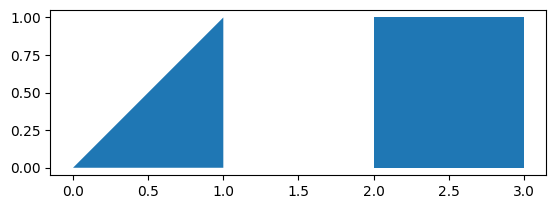

In [29]:
import matplotlib.pyplot as plt

g.plot()
plt.show()

[Link to GeoPandas](https://github.com/geopandas/geopandas).